In [25]:
# !/usr/bin/python
# -*- coding:utf-8 -*-

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.mixture import GaussianMixture

from matplotlib.font_manager import FontProperties
font_set = FontProperties(fname='../fonts/simhei.ttf', size=15)
fontproperties=font_set
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False


In [26]:
np.random.seed(0)
mu1_fact = (0, 0, 0)
cov1_fact = np.diag((1, 2, 3))
data1 = np.random.multivariate_normal(mu1_fact, cov1_fact, 400)
mu2_fact = (2, 2, 1)
cov2_fact = np.array(((1, 1, 3), (1, 2, 1), (0, 0, 1)))
data2 = np.random.multivariate_normal(mu2_fact, cov2_fact, 100)
data = np.vstack((data1, data2))
y = np.array([True] * 400 + [False] * 100)

In [24]:
# sklearn
g = GaussianMixture(n_components=2, covariance_type='full', tol=1e-6, max_iter=1000)
g.fit(data)
print '类别概率:\t', g.weights_[0]
print '均值:\n', g.means_, '\n'
print '方差:\n', g.covariances_, '\n'
mu1, mu2 = g.means_
sigma1, sigma2 = g.covariances_
norm1 = multivariate_normal(mu1, sigma1)
norm2 = multivariate_normal(mu2, sigma2)
tau1 = norm1.pdf(data)
tau2 = norm2.pdf(data)

类别概率:	0.763764417242
均值:
[[-0.12545026 -0.02183228 -0.06013886]
 [ 1.90145979  1.78791612  1.11152488]] 

方差:
[[[ 0.82510396 -0.10305039 -0.04196107]
  [-0.10305039  2.15967326 -0.16419171]
  [-0.04196107 -0.16419171  2.79315808]]

 [[ 0.70231279  0.91058406  0.739577  ]
  [ 0.91058406  1.8945702   0.77350206]
  [ 0.739577    0.77350206  2.95297451]]] 



[0 1]
准确率：89.80%


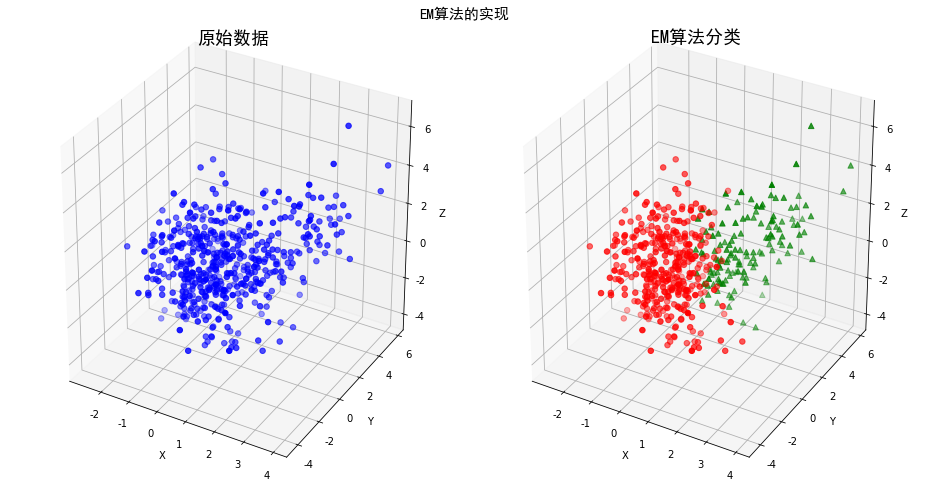

In [27]:
fig = plt.figure(figsize=(13, 7), facecolor='w')
ax = fig.add_subplot(121, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c='b', s=30, marker='o', depthshade=True)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(u'原始数据', fontsize=18, fontproperties=fontproperties)
ax = fig.add_subplot(122, projection='3d')
order = pairwise_distances_argmin([mu1_fact, mu2_fact], [mu1, mu2], metric='euclidean')
print order
if order[0] == 0:
    c1 = tau1 > tau2
else:
    c1 = tau1 < tau2
c2 = ~c1
acc = np.mean(y == c1)
print u'准确率：%.2f%%' % (100 * acc)
ax.scatter(data[c1, 0], data[c1, 1], data[c1, 2], c='r', s=30, marker='o', depthshade=True)
ax.scatter(data[c2, 0], data[c2, 1], data[c2, 2], c='g', s=30, marker='^', depthshade=True)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(u'EM算法分类', fontsize=18, fontproperties=fontproperties)
plt.suptitle(u'EM算法的实现', fontsize=21, fontproperties=fontproperties)
plt.subplots_adjust(top=0.90)
plt.tight_layout()
plt.show()

In [34]:
#自定义算法
num_iter = 100
n, d = data.shape
# 随机指定
mu1 = np.random.standard_normal(d)
print mu1
mu2 = np.random.standard_normal(d)
print mu2
# mu1 = data.min(axis=0)
# mu2 = data.max(axis=0)
sigma1 = np.identity(d)
sigma2 = np.identity(d)
pi = 0.5
# EM
for i in range(num_iter):
    # E Step
    norm1 = multivariate_normal(mu1, sigma1)
    norm2 = multivariate_normal(mu2, sigma2)
    tau1 = pi * norm1.pdf(data)
    tau2 = (1 - pi) * norm2.pdf(data)
    gamma = tau1 / (tau1 + tau2)

    # M Step
    mu1 = np.dot(gamma, data) / np.sum(gamma)
    mu2 = np.dot((1 - gamma), data) / np.sum((1 - gamma))
    sigma1 = np.dot(gamma * (data - mu1).T, data - mu1) / np.sum(gamma)
    sigma2 = np.dot((1 - gamma) * (data - mu2).T, data - mu2) / np.sum(1 - gamma)
    pi = np.sum(gamma) / n
    print i, ":\t", mu1, mu2
print '类别概率:\t', pi
print '均值:\t', mu1, mu2
print '方差:\n', sigma1, '\n\n', sigma2, '\n'  # 预测分类

[ 0.09866745  0.19718106  1.05902725]
[-1.02256439 -0.85524046  1.25721965]
0 :	[ 0.65786905  0.91693498  0.19602169] [-0.42775156 -0.90582149  0.26956838]
1 :	[ 0.65532363  0.93695169  0.18635438] [-0.35761379 -0.84525701  0.28798649]
2 :	[ 0.66403632  0.9626438   0.19620061] [-0.31953569 -0.80070697  0.2609446 ]
3 :	[ 0.67533096  0.98774001  0.21358138] [-0.29065069 -0.75861798  0.22278783]
4 :	[ 0.68795826  1.01240409  0.23534392] [-0.26579735 -0.71708387  0.18205442]
5 :	[ 0.7019038   1.03670029  0.26011537] [-0.24378912 -0.67547583  0.14217554]
6 :	[ 0.71747071  1.060227    0.28685346] [-0.22463329 -0.63340083  0.10519877]
7 :	[ 0.73502962  1.08238551  0.31464754] [-0.20855595 -0.59064741  0.07236047]
8 :	[ 0.75486118  1.10267121  0.34282321] [-0.195562   -0.54726757  0.0441354 ]
9 :	[ 0.77709378  1.1207983   0.37096016] [-0.18537832 -0.5035625   0.02044356]
10 :	[ 0.80172687  1.13667973  0.3988164 ] [-0.17756659 -0.45995393  0.00092411]
11 :	[ 0.82869406  1.1503688   0.42625449] 

In [35]:
norm1 = multivariate_normal(mu1, sigma1)
norm2 = multivariate_normal(mu2, sigma2)
tau1 = norm1.pdf(data)
tau2 = norm2.pdf(data)

[1 0]
准确率：89.80%


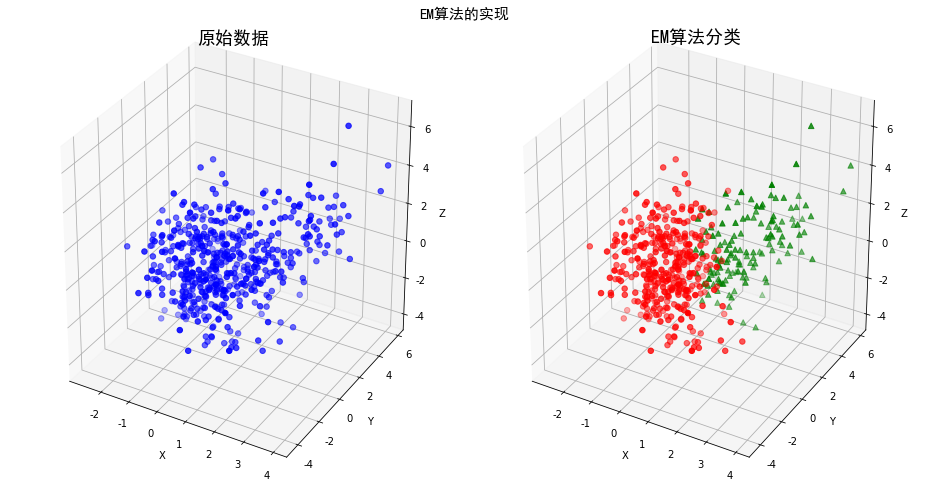

In [36]:
fig = plt.figure(figsize=(13, 7), facecolor='w')
ax = fig.add_subplot(121, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c='b', s=30, marker='o', depthshade=True)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(u'原始数据', fontsize=18, fontproperties=fontproperties)
ax = fig.add_subplot(122, projection='3d')
order = pairwise_distances_argmin([mu1_fact, mu2_fact], [mu1, mu2], metric='euclidean')
print order
if order[0] == 0:
    c1 = tau1 > tau2
else:
    c1 = tau1 < tau2
c2 = ~c1
acc = np.mean(y == c1)
print u'准确率：%.2f%%' % (100 * acc)
ax.scatter(data[c1, 0], data[c1, 1], data[c1, 2], c='r', s=30, marker='o', depthshade=True)
ax.scatter(data[c2, 0], data[c2, 1], data[c2, 2], c='g', s=30, marker='^', depthshade=True)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(u'EM算法分类', fontsize=18, fontproperties=fontproperties)
plt.suptitle(u'EM算法的实现', fontsize=21, fontproperties=fontproperties)
plt.subplots_adjust(top=0.90)
plt.tight_layout()
plt.show()